In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

In [24]:
filename = "../data/all_data.json"
#filename = "csb-53/data/all_data.json"

df = pd.read_json(filename, convert_dates=["release_date"])
df

,artist,album,release_date,userscore,metascore,link_album,link_img,genres,grammy,billboard
0,Sigur Rós,(),2002-10-29,88.0,82,https://www.metacritic.com/music/()/sigur-ros,https://static.metacritic.com/images/products/...,"[Indie, Rock]",None,None
1,Ed Sheeran,Divide,2017-03-03,47.0,62,https://www.metacritic.com/music/(divide)/ed-s...,https://static.metacritic.com/images/products/...,[Pop/Rock],None,"{'2017': 4, '2018': 5, '2019': 31, '2020': 65}"
2,Ed Sheeran,+,2012-06-12,76.0,67,https://www.metacritic.com/music/+/ed-sheeran,https://static.metacritic.com/images/products/...,[Pop/Rock],None,"{'2012': 136, '2013': 46, '2014': 122, '2015':..."
3,Jewel,0304,2003-06-03,63.0,63,https://www.metacritic.com/music/0304/jewel,https://static.metacritic.com/images/products/...,"[Pop, Adult Alternative, Singer-Songwriter]",None,{'2003': 110}
4,High Places,03/07-09/07,2008-07-22,77.0,81,https://www.metacritic.com/music/0307-0907/hig...,https://static.metacritic.com/images/products/...,[Electronic],None,None
...,...,...,...,...,...,...,...,...,...,...
3241,Joanna Newsom,Ys,2006-11-14,84.0,85,https://www.metacritic.com/music/ys/joanna-newsom,https://static.metacritic.com/images/products/...,"[Indie, Rock, Folk]",None,None
3242,Smashing Pumpkins,Zeitgeist,2007-07-10,77.0,59,https://www.metacritic.com/music/zeitgeist/the...,https://static.metacritic.com/images/products/...,"[Rock, Alternative]",None,{'2007': 165}
3243,Tal National,Zoy Zoy,2015-04-13,NaN,82,https://www.metacritic.com/music/zoy-zoy/tal-n...,https://static.metacritic.com/images/products/...,"[Pop/Rock, International, West African, Africa...",None,None
3244,Denzel Curry,ZUU,2019-05-31,80.0,85,https://www.metacritic.com/music/zuu/denzel-curry,https://static.metacritic.com/images/products/...,[Rap],None,None


In [25]:
df_genres_wrapped = df[["genres", "artist", "album", "link_album"]]
df_genres_wrapped


,genres,artist,album,link_album
0,"[Indie, Rock]",Sigur Rós,(),https://www.metacritic.com/music/()/sigur-ros
1,[Pop/Rock],Ed Sheeran,Divide,https://www.metacritic.com/music/(divide)/ed-s...
2,[Pop/Rock],Ed Sheeran,+,https://www.metacritic.com/music/+/ed-sheeran
3,"[Pop, Adult Alternative, Singer-Songwriter]",Jewel,0304,https://www.metacritic.com/music/0304/jewel
4,[Electronic],High Places,03/07-09/07,https://www.metacritic.com/music/0307-0907/hig...
...,...,...,...,...
3241,"[Indie, Rock, Folk]",Joanna Newsom,Ys,https://www.metacritic.com/music/ys/joanna-newsom
3242,"[Rock, Alternative]",Smashing Pumpkins,Zeitgeist,https://www.metacritic.com/music/zeitgeist/the...
3243,"[Pop/Rock, International, West African, Africa...",Tal National,Zoy Zoy,https://www.metacritic.com/music/zoy-zoy/tal-n...
3244,[Rap],Denzel Curry,ZUU,https://www.metacritic.com/music/zuu/denzel-curry


# Unwrap genres

In [131]:
all_albums = []
for v in df_genres_wrapped.values:
    # each genre
    if(v[0] is not None):
        for g in v[0]:
            all_albums.append((g, v[1], v[2], v[3]))
df_genres = pd.DataFrame(all_albums, columns=["genre", "artist", "album", "link_album"])
df_genres


,genre,artist,album,link_album
0,Indie,Sigur Rós,(),https://www.metacritic.com/music/()/sigur-ros
1,Rock,Sigur Rós,(),https://www.metacritic.com/music/()/sigur-ros
2,Pop/Rock,Ed Sheeran,Divide,https://www.metacritic.com/music/(divide)/ed-s...
3,Pop/Rock,Ed Sheeran,+,https://www.metacritic.com/music/+/ed-sheeran
4,Pop,Jewel,0304,https://www.metacritic.com/music/0304/jewel
...,...,...,...,...
8010,Afro-beat,Tal National,Zoy Zoy,https://www.metacritic.com/music/zoy-zoy/tal-n...
8011,Nigerian,Tal National,Zoy Zoy,https://www.metacritic.com/music/zoy-zoy/tal-n...
8012,Rap,Denzel Curry,ZUU,https://www.metacritic.com/music/zuu/denzel-curry
8013,Indie,My Morning Jacket,Z,https://www.metacritic.com/music/z/my-morning-...


# Filter genres

In [132]:
N_GENRES = 40

count_values = df_genres.value_counts(["genre"])
bef_genres = len(count_values)
bef_df = len(df_genres)

genres_get = df_genres.value_counts(["genre"]).nlargest(N_GENRES)
genres_get = [g[0] for g in list(genres_get.index)]
df_genres = df_genres[df_genres["genre"].isin(genres_get)]

count_values = df_genres.value_counts(["genre"])

after_genres = len(count_values)
after_df = len(df_genres)
print(f"Genres: {bef_genres} -> {after_genres}")
print(f"DF: {bef_df} -> {after_df}")

df_genres

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [builtin_function_or_method]

# Clusterization

In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import DistanceMetric

In [73]:
genres_matr = []
# all_data = {"artist": [], "album": [], "link_album": []}
all_data = {"link_album": []}
all_genres = df_genres["genre"].unique()

for g in all_genres:
    all_data[g] = []

for link in df_genres["link_album"].unique():
    rows_album = df_genres[df_genres["link_album"] == link]
    album = rows_album.iloc[0]
    genres_album = [r[0] for r in rows_album.values]
    # for key, val in [("artist", album[1]), ("album", album[2]), ("link_album", album[3])]:
    for key, val in [("link_album", album[3])]:
        all_data[key].append(val)
    for genre in all_genres:
        all_data[genre].append(1 if genre in genres_album else 0)

df_prep = pd.DataFrame.from_dict(all_data).set_index("link_album")
df_prep


,Indie,Rock,Pop/Rock,Pop,Singer-Songwriter,Electronic,R&B,Club/Dance,Alternative,Metal,...,Adult Alternative Pop/Rock,Alternative/Indie Rock,Indie Rock,Alternative Singer/Songwriter,Country,Contemporary Country,Alternative Pop/Rock,Experimental,Jazz,Hardcore Rap
link_album,,,,,,,,,,,,,,,,,,,,,
https://www.metacritic.com/music/()/sigur-ros,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.metacritic.com/music/(divide)/ed-sheeran,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.metacritic.com/music/+/ed-sheeran,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.metacritic.com/music/0304/jewel,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.metacritic.com/music/0307-0907/high-places,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.metacritic.com/music/ys/joanna-newsom,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.metacritic.com/music/zeitgeist/the-smashing-pumpkins,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
https://www.metacritic.com/music/zoy-zoy/tal-national,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df_cocurrency = df_prep.T.dot(df_prep)
df_cocurrency

,Indie,Rock,Pop/Rock,Pop,Singer-Songwriter,Electronic,R&B,Club/Dance,Alternative,Metal,...,Adult Alternative Pop/Rock,Alternative/Indie Rock,Indie Rock,Alternative Singer/Songwriter,Country,Contemporary Country,Alternative Pop/Rock,Experimental,Jazz,Hardcore Rap
Indie,503,476,0,40,29,27,1,0,42,0,...,0,0,0,0,3,0,0,12,0,0
Rock,476,1011,0,138,55,32,7,0,301,63,...,0,2,0,0,18,0,0,34,1,0
Pop/Rock,0,0,1049,93,0,71,56,28,1,5,...,48,461,91,53,49,21,157,10,10,10
Pop,40,138,93,340,4,20,79,12,29,0,...,11,16,1,3,6,3,3,0,6,1
Singer-Songwriter,29,55,0,4,68,0,1,0,8,0,...,0,0,0,0,3,0,0,1,1,0
Electronic,27,32,71,20,0,291,7,56,18,0,...,0,26,3,1,0,0,8,12,2,0
R&B,1,7,56,79,1,7,285,3,0,0,...,2,5,0,0,3,0,1,0,2,0
Club/Dance,0,0,28,12,0,56,3,63,0,0,...,0,9,0,1,0,0,2,1,0,0
Alternative,42,301,1,29,8,18,0,0,323,38,...,0,0,0,0,8,0,1,3,0,0
Metal,0,63,5,0,0,0,0,0,38,75,...,0,0,0,0,0,0,0,0,0,0


# Normalize values

In [75]:
for row in range(len(df_cocurrency)):
    val_div = df_cocurrency.iloc[row][row]
    # for column in range(len(df_cocurrency)):
    df_cocurrency.iloc[row] /= val_div
np.fill_diagonal(df_cocurrency.values, 0)
df_cocurrency

,Indie,Rock,Pop/Rock,Pop,Singer-Songwriter,Electronic,R&B,Club/Dance,Alternative,Metal,...,Adult Alternative Pop/Rock,Alternative/Indie Rock,Indie Rock,Alternative Singer/Songwriter,Country,Contemporary Country,Alternative Pop/Rock,Experimental,Jazz,Hardcore Rap
Indie,0.000000,0.946322,0.000000,0.079523,0.057654,0.053678,0.001988,0.000000,0.083499,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005964,0.000000,0.000000,0.023857,0.000000,0.000000
Rock,0.470821,0.000000,0.000000,0.136499,0.054402,0.031652,0.006924,0.000000,0.297725,0.062315,...,0.000000,0.001978,0.000000,0.000000,0.017804,0.000000,0.000000,0.033630,0.000989,0.000000
Pop/Rock,0.000000,0.000000,0.000000,0.088656,0.000000,0.067684,0.053384,0.026692,0.000953,0.004766,...,0.045758,0.439466,0.086749,0.050524,0.046711,0.020019,0.149666,0.009533,0.009533,0.009533
Pop,0.117647,0.405882,0.273529,0.000000,0.011765,0.058824,0.232353,0.035294,0.085294,0.000000,...,0.032353,0.047059,0.002941,0.008824,0.017647,0.008824,0.008824,0.000000,0.017647,0.002941
Singer-Songwriter,0.426471,0.808824,0.000000,0.058824,0.000000,0.000000,0.014706,0.000000,0.117647,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.044118,0.000000,0.000000,0.014706,0.014706,0.000000
Electronic,0.092784,0.109966,0.243986,0.068729,0.000000,0.000000,0.024055,0.192440,0.061856,0.000000,...,0.000000,0.089347,0.010309,0.003436,0.000000,0.000000,0.027491,0.041237,0.006873,0.000000
R&B,0.003509,0.024561,0.196491,0.277193,0.003509,0.024561,0.000000,0.010526,0.000000,0.000000,...,0.007018,0.017544,0.000000,0.000000,0.010526,0.000000,0.003509,0.000000,0.007018,0.000000
Club/Dance,0.000000,0.000000,0.444444,0.190476,0.000000,0.888889,0.047619,0.000000,0.000000,0.000000,...,0.000000,0.142857,0.000000,0.015873,0.000000,0.000000,0.031746,0.015873,0.000000,0.000000
Alternative,0.130031,0.931889,0.003096,0.089783,0.024768,0.055728,0.000000,0.000000,0.000000,0.117647,...,0.000000,0.000000,0.000000,0.000000,0.024768,0.000000,0.003096,0.009288,0.000000,0.000000
Metal,0.000000,0.840000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.506667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Distance Matrix

In [76]:
dist = DistanceMetric.get_metric("euclidean")
df_dist = pd.DataFrame(dist.pairwise(df_cocurrency.to_numpy()), columns=df_cocurrency.columns, index=df_cocurrency.columns)

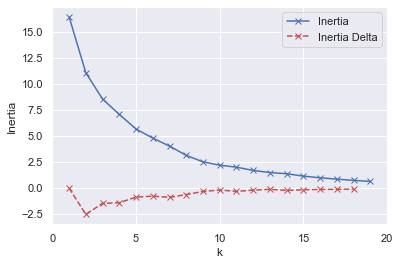

In [88]:
from sklearn.cluster import KMeans

X = df_cocurrency.values

inertia = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    inertia.append(kmeanModel.inertia_)

plt.plot(K, inertia, "bx-")
plt.plot(K[:-1], [0 if i == 0 else inertia[i+1]-inertia[i] for i in range(len(K)-1)], "rx--")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.xticks([0, 5, 10, 15, 20])
plt.legend(["Inertia", "Inertia Delta"])

plt.show()

NameError: name 'features' is not defined

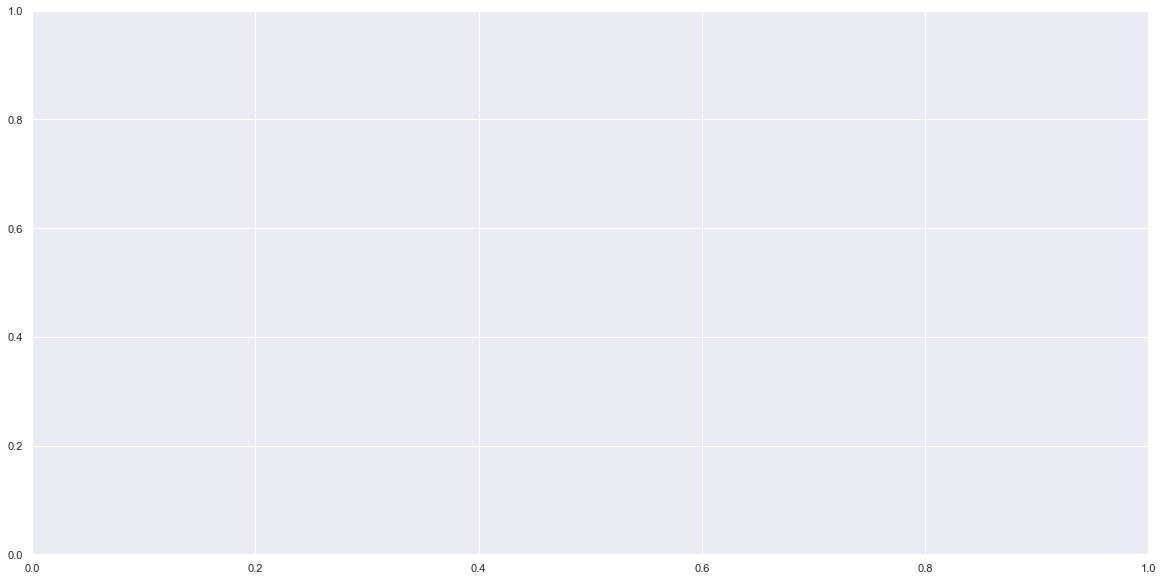

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(10)
fig.set_figwidth(20)

kmeans = KMeans(n_clusters=7).fit(X)

labels = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labelled_albuns = pd.concat((features,labels),axis=1)
labelled_albuns = labelled_albuns.rename({0:'labels'},axis=1)

sns.pairplot(labelled_albuns, hue='labels', ax=axes)

# sns.lmplot(x='',y='S.F.Ratio',data=labelled_albuns,hue='labels',fit_reg=False)

plt.show(fig)